### Lightweight Analysis

In [129]:
import pandas as pd
import seaborn as sns

In [2]:
supply_metrics = pd.read_csv('../data/supply_metrics.csv')

### Review Metrics

In [9]:
metrics = ['product_waste', 'product_stockout', 'depot_waste', 
           'forecast_waste', 'forecast_stockout', 'waste_prediction_waste',
          'waste_prediction_stockout', 'stock_waste', 'stock_stockout', 'negative_stockfile']

In [10]:
top100 = pd.Series(supply_metrics['upc'].value_counts()[(supply_metrics['upc'].value_counts() > 12400)].index)

In [11]:
supply_metrics.shape

(1750865, 72)

In [12]:
top100_metrics = supply_metrics[supply_metrics['upc'].isin(top100)]

In [13]:
top100_metrics.shape

(1336855, 72)

In [82]:
store2000 = pd.Series(supply_metrics['store_id'].value_counts()[(supply_metrics['store_id'].value_counts() > 2000)].index)

In [83]:
final_data = supply_metrics[supply_metrics['upc'].isin(top100) & supply_metrics['store_id'].isin(store2000)]

### Save out final data

In [24]:
final_data.to_csv('../data/final_data.csv', index=False)

### Which metrics are important?

In [85]:
table = (final_data[metrics].apply(lambda x: x.value_counts())
                     .transpose()
                     .sort_values(True, ascending=False)).reset_index()

table = table.rename(columns={'index':'Metric', True:'Occurrence'})
table['Occurrence'] = table['Occurrence'].fillna(0)
table = table.drop([False], axis=1)
table['Percentage (%)'] = table['Occurrence'].apply(lambda x: round(100*(x / table['Occurrence'].sum()), 1))

In [86]:
table.to_csv('../data/metric_occurrence.csv', index=False)

In [87]:
table.head()

,Metric,Occurrence,Percentage (%)
0,waste_prediction_waste,786352.0,47.8
1,forecast_stockout,341758.0,20.8
2,forecast_waste,247849.0,15.1
3,waste_prediction_stockout,232626.0,14.1
4,depot_waste,36052.0,2.2


#### How much waste?

In [90]:
waste_fore = table['Metric'][table['Metric'].str.contains('(^(forecast|waste))')]

In [91]:
table[table['Metric'].isin(waste_fore)]['Occurrence'].sum() / table['Occurrence'].sum()

0.9776730362482678

### Waste Prediction Waste

In [92]:
waste_slice = final_data[final_data['waste_prediction_waste']]

In [23]:
waste_slice['waste_value_on_day'].value_counts()

0.00     750690
4.00       3035
2.50       2759
3.00       2610
1.00       2414
          ...  
13.25         1
18.60         1
0.34          1
18.90         1
62.50         1
Name: waste_value_on_day, Length: 354, dtype: int64

In [97]:
750690 / waste_slice.shape[0]

0.9546488086760128

### By region by day

In [104]:
metrics

['product_waste',
 'product_stockout',
 'depot_waste',
 'forecast_waste',
 'forecast_stockout',
 'waste_prediction_waste',
 'waste_prediction_stockout',
 'stock_waste',
 'stock_stockout',
 'negative_stockfile']

In [173]:
lookup = final_data.groupby('depot_store_id')['store_id'].nunique().reset_index()
lookup['depot_store_id'] = lookup['depot_store_id'].astype('int').astype('category')
lookup = lookup.rename(columns = {'store_id':'no_of_stores'})

In [180]:
final_data['depot_store_id'] = final_data['depot_store_id'].astype('int').astype('category')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
final_data.merge(lookup, on='depot_store_id')

,upc,calendar_date,store_id,geography_id,shelf_life,units_per_tray,cal_gross_sales_qty_on_day,closing_inventory_min_neg_over_shelf_life_minus_2_days,closing_inventory_neg_count_over_1_day,closing_inventory_neg_count_over_shelf_life_minus_2_days,...,product_stockout,depot_waste,forecast_waste,forecast_stockout,waste_prediction_waste,waste_prediction_stockout,stock_waste,stock_stockout,negative_stockfile,no_of_stores
0,464345,2018-07-07,2061,6729,6,10,12.0,NaN,0,0,...,False,True,False,True,False,False,False,False,False,62
1,313643,2018-07-07,3777,678,8,22,49.0,NaN,0,0,...,False,False,False,True,True,False,False,False,False,62
2,558006,2018-07-07,2157,3279,5,6,3.0,NaN,0,0,...,False,False,False,True,False,False,False,False,False,62
3,593441,2018-07-07,2097,6864,3,8,7.0,NaN,0,0,...,False,False,False,False,False,False,False,False,False,62
4,558020,2018-07-07,4828,936,5,6,2.0,NaN,0,0,...,False,False,False,False,False,False,False,False,False,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334778,434515,2018-08-06,8714,1425,7,12,5.0,NaN,0,0,...,False,False,False,True,True,False,False,False,False,68
1334779,427722,2018-08-06,1432,6100,5,12,9.0,NaN,0,0,...,False,False,False,False,False,True,False,False,False,68
1334780,301428,2018-08-06,2545,567,2,7,11.0,NaN,0,0,...,False,False,False,False,False,True,False,False,False,68
1334781,466769,2018-08-06,8714,1425,5,12,16.0,NaN,0,0,...,False,False,False,True,True,False,False,False,False,68


In [182]:
sum_flags = final_data.groupby(['calendar_date','depot_store_id'])[metrics].apply(lambda x: x.sum()).reset_index()
sum_flags['depot_store_id'] = sum_flags['depot_store_id'].astype('int').astype('category')

In [188]:
sum_flags = sum_flags.merge(lookup, on='depot_store_id')

In [192]:
sum_flags['normalised_waste_pred'] = sum_flags['waste_prediction_waste'] / sum_flags['no_of_stores']

In [155]:
import matplotlib.pyplot as plt

In [156]:
import matplotlib

In [206]:
sum_flags_filter = sum_flags[sum_flags['depot_store_id'].isin([3942, 5212])]

[]

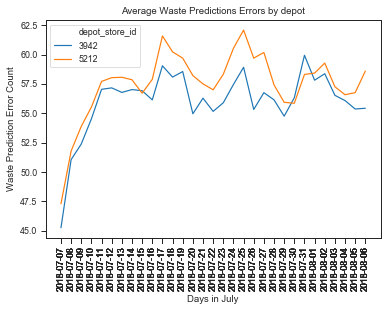

In [208]:
sns.set_context("paper")
sns.axes_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8,
                       "ytick.major.size":8})
ax = sns.lineplot(x="calendar_date", y="normalised_waste_pred",
                     hue="depot_store_id",
                     data=sum_flags_filter)
plt.title("Average Waste Predictions Errors by depot")
plt.ylabel("Waste Prediction Error Count")
plt.xlabel("Days in July")
plt.xticks(sum_flags['calendar_date'], rotation='90')
plt.plot()

In [ ]:
ax = sns.countplot(x="Column", data=ds)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [126]:
sum_flags[['calendar_date', 'depot_store_id', 'waste_prediction_waste']]

,calendar_date,depot_store_id,waste_prediction_waste
0,2018-07-07,3942.0,2218
1,2018-07-07,5173.0,2994
2,2018-07-07,5212.0,2933
3,2018-07-07,5380.0,1572
4,2018-07-07,5652.0,2230
...,...,...,...
243,2018-08-06,5380.0,2265
244,2018-08-06,5652.0,2724
245,2018-08-06,5908.0,3247
246,2018-08-06,5966.0,3648
